In [67]:
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
import datetime
import time
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import os

from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU


from sklearn.metrics import mean_absolute_error  # MSE
from IPython.display import Image 

plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

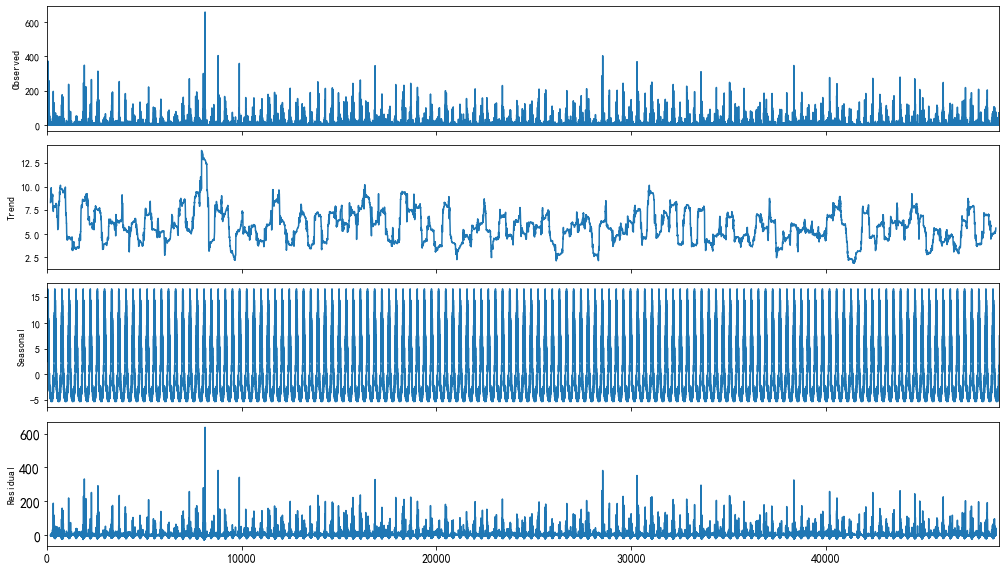

In [81]:
# from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm 
# plt.rc("figure", figsize=(14, 8))
 
df=pd.read_excel('.\data\cairnsrainfall.xls')
# df['Period']=pd.to_datetime(df['Period'])
# df.set_index('Period',inplace=True)
 
res = sm.tsa.seasonal_decompose(df['daily_rain'],freq=365,model="additive")
plt.rcParams.update({'figure.figsize': (14, 8)})
res.plot()
# res.plot().suptitle('STL decomposition')

 
df['trend']=res.trend
df['seasonal']=res.seasonal
df['resid']=res.resid
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.savefig("STLrainfallwhole.png",dpi=600)#保存图片，分辨率为600

In [70]:
#从数据中删除趋势项
df['detrend']=df['daily_rain']-df.trend
#从数据中删除季节项
df['deseasonal']=df['daily_rain']-df.seasonal

In [71]:
trend_strength=max(0,1-df.resid.var()/df.deseasonal.var())
seasonal_strength=max(0,1-df.resid.var()/df.detrend.var())
print('trend_strength:',trend_strength)
print('seasonal_strength:',seasonal_strength)

trend_strength: 0.01633712828176126
seasonal_strength: 0.08623460288151308


In [72]:
period=12
peak = (np.argmax(df.seasonal) + 1) % period
peak = period if peak == 0 else peak
 
print("peak:",peak)

peak: 3


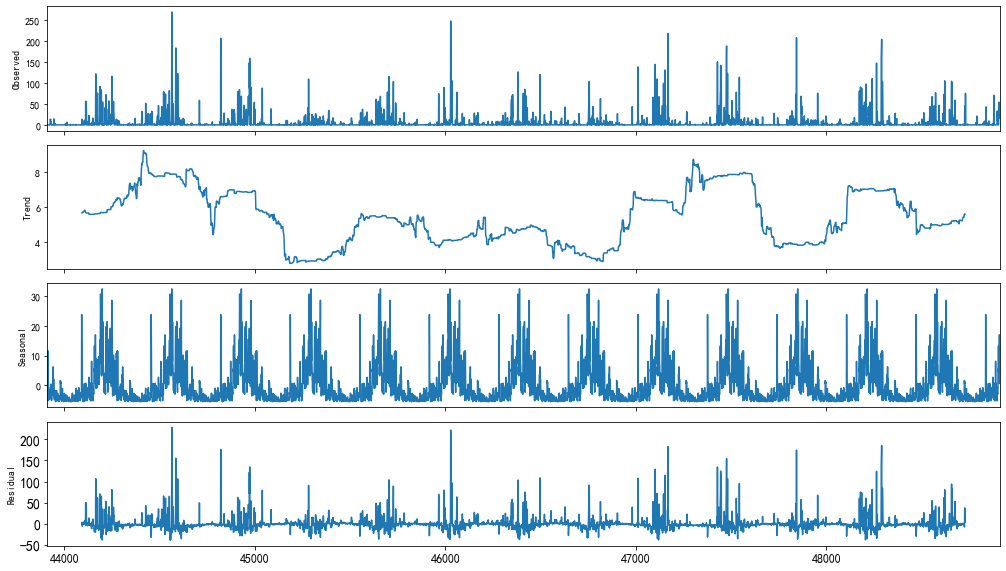

In [80]:
df=df[-5000:]
plt.rc("figure", figsize=(14,8))

res = sm.tsa.seasonal_decompose(df['daily_rain'],freq=365,model="additive")
res.plot()
 
df['trend']=res.trend
df['seasonal']=res.seasonal
df['resid']=res.resid
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.savefig("STLrainfall.png",dpi=600)#保存图片，分辨率为600

In [74]:
dfDO=pd.read_excel('.\data\cairnsrainfall.xls')   
#dfDO = df.values
dfDO.head(5)

,date,timestep,daily_rain
0,1889-01-01,1,4.3
1,1889-01-02,2,0.6
2,1889-01-03,3,0.1
3,1889-01-04,4,0.0
4,1889-01-05,5,0.0


In [75]:
dfDO.set_index('timestep',inplace=True)  # 日期变为索引就不是字段了
# dfDO.index=pd.to_datetime(dfDO.index)

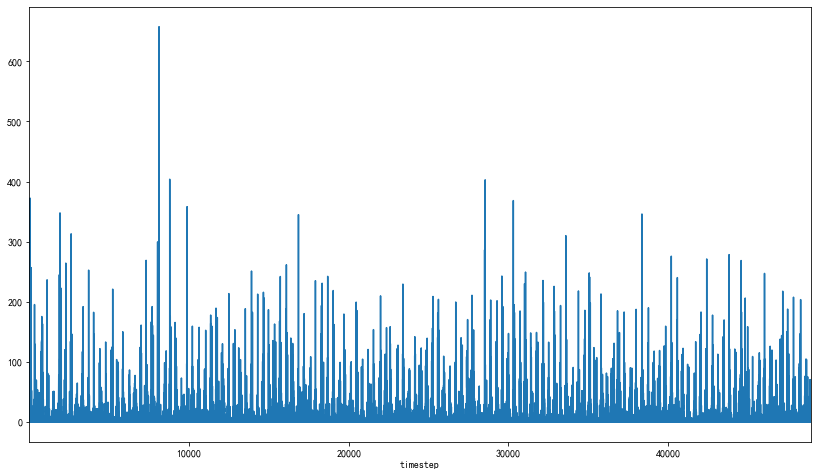

In [76]:
dfDO.dropna(inplace=True)
dfDO['daily_rain'].plot()

In [37]:
df=dfDO[-1000:]
df.head(5)

,daily_rain
timestep,
47943,0.0
47944,3.0
47945,2.6
47946,0.0
47947,0.0


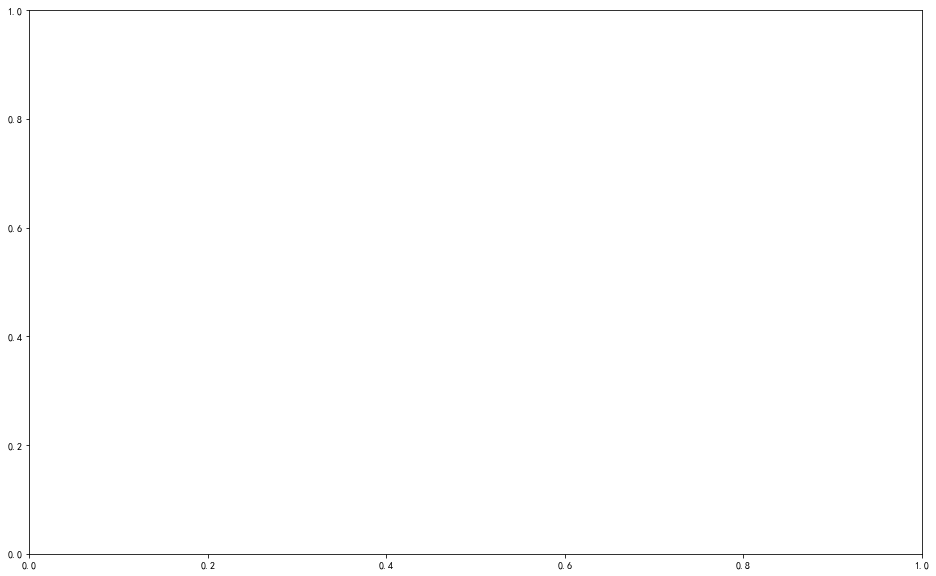

<Figure size 1080x432 with 0 Axes>

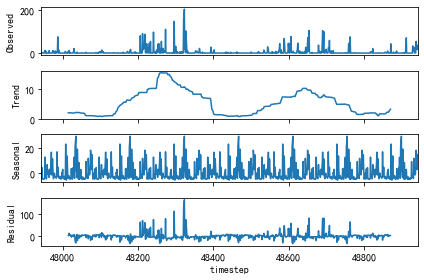

In [40]:
import statsmodels.api as sm 
f, res= plt.subplots(figsize = (16, 10))
res = sm.tsa.seasonal_decompose(df['daily_rain'],freq=144,model="additive") 
plt.figure(figsize=(15,6))
res.plot()
plt.savefig("STLrainfall.png",dpi=600)#保存图片，分辨率为600